In [4]:
!pip install scikit-learn pandas matplotlib nltk


In [5]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
import nltk, re
nltk.download('stopwords'); from nltk.corpus import stopwords
RANDOM_STATE = 42


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# Load the uploaded dataset
file_path = "/content/Dataset-SA.csv"
df = pd.read_csv(file_path)

# Show first few rows and column names to adjust code
df.head(), df.columns

(                                        product_name product_price Rate  \
 0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
 1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
 2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
 3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
 4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
 
             Review                                            Summary  \
 0           super!  great cooler excellent air flow and for this p...   
 1          awesome              best budget 2 fit cooler nice cooling   
 2             fair  the quality is good but the power of air is de...   
 3  useless product                  very bad product its a only a fan   
 4             fair                                      ok ok product   
 
   Sentiment  
 0  positive  
 1  positive  
 2  positive  
 3  negative  
 4   neutral  ,
 Inde

In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Dataset-SA.csv")

# Keep only review text and sentiment
df = df[["Review", "Sentiment"]].dropna()

# Map sentiment to binary labels
label_map = {"negative": 0, "positive": 1}
df["label"] = df["Sentiment"].str.lower().map(label_map)

# Remove rows with labels not in the map (e.g., 'neutral')
df = df.dropna(subset=["label"])

# Check label distribution
print(df["label"].value_counts())

# Preview
df.head()


label
1.0    102329
0.0     17535
Name: count, dtype: int64


/tmp/ipython-input-4067607846.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Dataset-SA.csv")


,Review,Sentiment,label
0,super!,positive,1.0
1,awesome,positive,1.0
2,fair,positive,1.0
3,useless product,negative,0.0
5,awesome,positive,1.0


In [10]:
def clean_text(text):
    text = text.lower()                                 # Lowercase
    text = re.sub(r"http\S+|www\S+", "", text)          # Remove URLs
    text = re.sub(r"[^a-z0-9\s]", " ", text)            # Remove special chars
    text = re.sub(r"\s+", " ", text).strip()            # Remove extra spaces
    return text

df["text_clean"] = df["Review"].astype(str).apply(clean_text)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df["text_clean"], df["label"],
    test_size=0.2, stratify=df["label"],
    random_state=RANDOM_STATE
)


In [12]:
pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        stop_words=stopwords.words("english"),
        ngram_range=(1,2),
        max_df=0.9,
        min_df=2
    )),
    ("clf", LogisticRegression(
        class_weight="balanced",
        max_iter=200,
        solver="liblinear"
    ))
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1, 2),
                                 stop_words=['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    solver='liblinear'))])

In [18]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Dataset-SA.csv")

# See first rows and column names
print(df.head())
print(df.columns)


                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  
Index(['product_name', 'pr

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Load dataset
df = pd.read_csv("/content/Dataset-SA.csv")

# 2. Keep only necessary columns & remove missing rows
df = df.dropna(subset=["Review", "Sentiment"])

# 3. Features (X) and Labels (y)
X = df["Review"]
y = df["Sentiment"]

# 4. Convert text to numeric features (TF-IDF)
vectorizer = TfidfVectorizer(stop_words="english")
X_vec = vectorizer.fit_transform(X)

# 5. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)

# 6. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 7. Predictions
y_pred = model.predict(X_test)

# 8. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 9. Try a custom review
custom_review = ["This cooler is amazing, works very well!"]
custom_vec = vectorizer.transform(custom_review)
print("Predicted Sentiment:", model.predict(custom_vec)[0])


Accuracy: 0.9107766505903875


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.85      0.75      0.80      4735
     neutral       0.00      0.00      0.00      1761
    positive       0.92      0.99      0.95     29582

    accuracy                           0.91     36078
   macro avg       0.59      0.58      0.58     36078
weighted avg       0.86      0.91      0.89     36078

Predicted Sentiment: positive


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0     0.8591    0.7748    0.8148      4880
           1     0.9201    0.9901    0.9538     29436
           2     0.0000    0.0000    0.0000      1762

    accuracy                         0.9126     36078
   macro avg     0.5931    0.5883    0.5895     36078
weighted avg     0.8669    0.9126    0.8884     36078

ROC-AUC Score: 0.8648100849790201


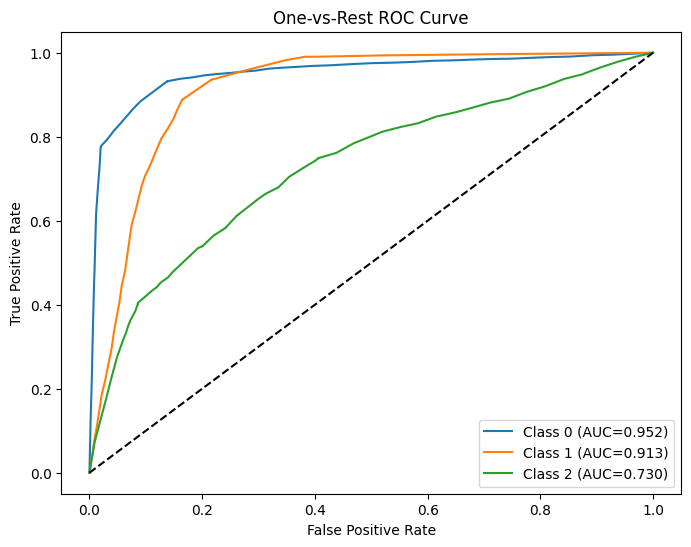

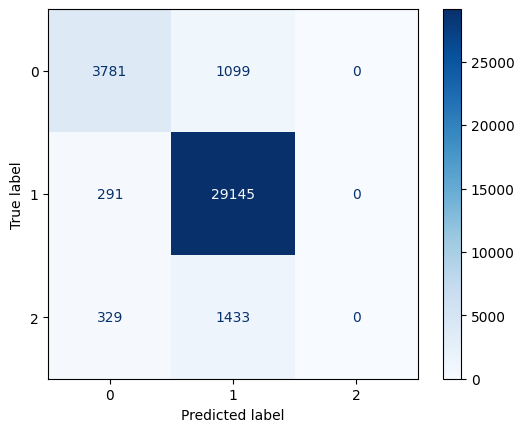

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Prepare X and y
X = df["Review"].astype(str)
y = df["Sentiment"].map({"negative": 0, "positive": 1, "neutral": 2})

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build pipeline
pipe = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression(max_iter=1000))
])

# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)

# Classification report
print(classification_report(y_test, y_pred, digits=4))

# ROC-AUC (handles both binary and multi-class)
if y_proba.shape[1] == 2:
    # Binary case
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    from sklearn.metrics import RocCurveDisplay
    RocCurveDisplay.from_predictions(y_test, y_proba[:, 1])
else:
    # Multi-class: binarize the labels
    classes = np.unique(y)
    y_test_bin = label_binarize(y_test, classes=classes)
    roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class="ovr")

    # Plot ROC for each class
    from sklearn.metrics import roc_curve, auc
    plt.figure(figsize=(8, 6))
    for i, cls in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        plt.plot(fpr, tpr, label=f"Class {cls} (AUC={auc(fpr, tpr):.3f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC Curve")
    plt.legend()

print("ROC-AUC Score:", roc_auc)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap="Blues")
plt.show()


In [ ]:
import joblib
joblib.dump(pipe, "sentiment_model.joblib")


['sentiment_model.joblib']

In [ ]:
example_reviews = [
    "This cooler is amazing, works perfectly!",
    "Very bad product, waste of money"
]
predictions = pipe.predict(example_reviews)
for review, label in zip(example_reviews, predictions):
    print(f"Review: {review} → Sentiment: {'Positive' if label == 1 else 'Negative'}")


Review: This cooler is amazing, works perfectly! → Sentiment: Positive
Review: Very bad product, waste of money → Sentiment: Negative
